<a href="https://colab.research.google.com/github/swatidamele/Jupyter-Notebooks/blob/main/Damele_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline as p
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import interp1d
from scipy import interpolate
import operator

**1. Generating 20 data pairs (X, Y) using given function**

In [ ]:
np.random.seed(3)
n=20   # Number of data points
X_dataset = []
Y_dataset = []
X=np.sort(np.random.uniform(0, 1, n))

for x in X:
    Y=m.sin(2*m.pi*x) + 0.1*np.random.normal(0,1)
    X_dataset.append(x)
    Y_dataset.append(Y)

In [ ]:
X_train = X_dataset[:10]
Y_train = Y_dataset[:10]
X_test = X_dataset[10:]
Y_test = Y_dataset[10:]

x = np.array(X_train).reshape(-1,1)
y = np.array(Y_train).reshape(-1, 1)

**2.  Finding weights of polynomial regression for order from 0 to 10 and plotting their respective fit**

loss :  0.35193011964512866
r2 :  0.0


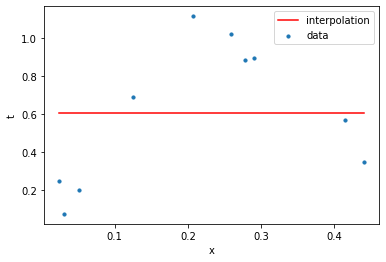

loss :  0.31918106122937284
r2 :  0.1774518036340177


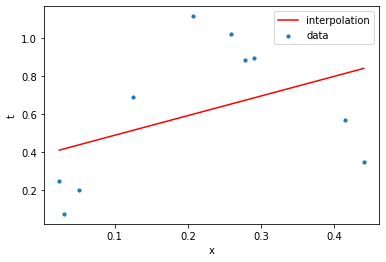

loss :  0.08927046527376872
r2 :  0.9356567901784387


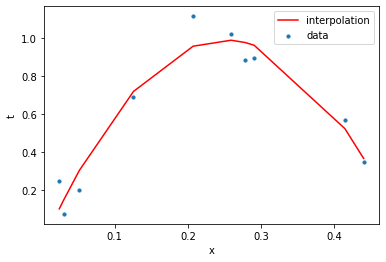

loss :  0.08924350601767951
r2 :  0.9356956469971767


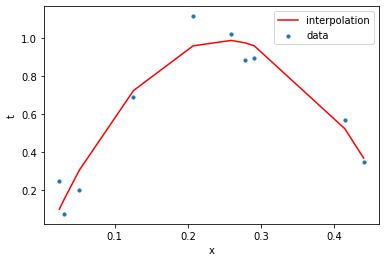

loss :  0.07994156036889546
r2 :  0.9484020594762633


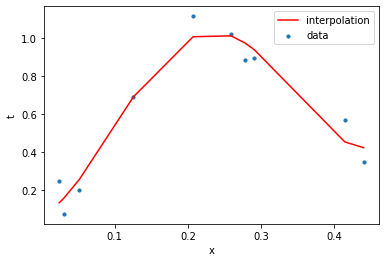

loss :  0.04217456630410134
r2 :  0.9856388778468022


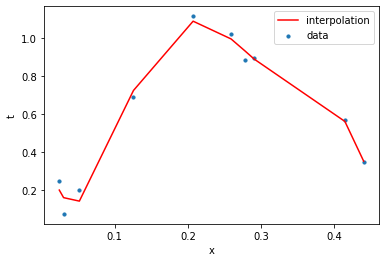

loss :  0.03945931623247804
r2 :  0.9874285249908329


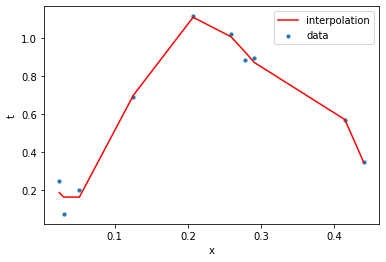

loss :  0.03879278924872671
r2 :  0.987849640167643


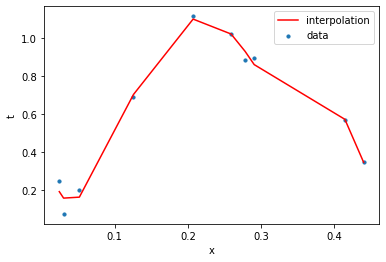

loss :  0.010154179174803562
r2 :  0.9991675143221965


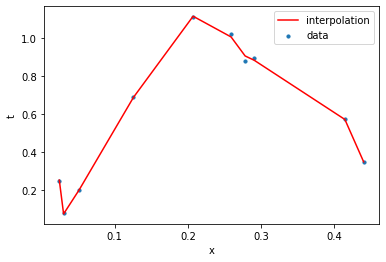

loss :  1.4448870193937297e-11
r2 :  1.0


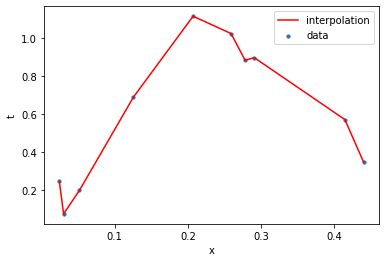

In [ ]:
x_test = np.array(X_test).reshape(-1,1)
y_test = np.array(Y_test).reshape(-1,1)
weights = []

for i in range(0,10):
    polynomial_features= PolynomialFeatures(degree = i)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    weights.append(model.intercept_.tolist() + model.coef_.tolist().pop(0))
 
    mean_value = mean_squared_error(y,y_poly_pred)
    rmse = np.sqrt(mean_value)
    r2 = r2_score(y,y_poly_pred)
    print("loss : ",rmse)
    print("r2 : ",r2)
  
    plt.scatter(x, y, s=10)
    plt.plot(x, y_poly_pred, color='r')
    plt.ylabel('t')
    plt.xlabel('x')
    plt.legend([ 'interpolation', 'data'])
    plt.show()


In [ ]:
for item in weights:
    item.pop(1)

In [ ]:
#Printing out the weights in the form of a table
pd.options.display.float_format = '{:,.2f}'.format
df1 = pd.DataFrame(weights).fillna('').transpose()
df1
df2 = df1.set_axis(['M = 0', 'M = 1', 'M = 2', 'M = 3', 'M = 4','M = 5','M = 6','M = 7', 'M = 8',  'M = 9'], axis=1, inplace=False)
df2
df3 = df2.set_axis(['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'], axis=0, inplace=False)
df3

,M = 0,M = 1,M = 2,M = 3,M = 4,M = 5,M = 6,M = 7,M = 8,M = 9
w0,0.60,0.39,-0.09,-0.10,0.08,0.58,0.41,0.60,3.75,2.93
w1,,1.03,8.63,8.83,1.11,-24.35,-13.96,-28.44,-294.62,-201.80
w2,,,-17.21,-18.29,58.99,409.34,209.41,595.39,"8,596.55","4,557.67"
w3,,,,1.53,-269.33,"-2,192.27",-538.50,"-5,158.25","-119,381.92","-31,828.95"
w4,,,,,303.55,"4,868.78","-1,705.73","26,451.63","911,622.15","-130,839.55"
w5,,,,,,"-3,910.62","8,469.28","-82,265.09","-4,019,844.59","3,199,776.05"
w6,,,,,,,"-8,863.90","138,016.05","10,170,918.20","-19,590,747.03"
w7,,,,,,,,"-93,906.85","-13,680,243.76","58,094,796.94"
w8,,,,,,,,,"7,567,663.52","-85,679,667.76"
w9,,,,,,,,,,"50,292,702.66"


**3.** **Plotting the graph between train error and test error after applying Higher Order Linear Regression**

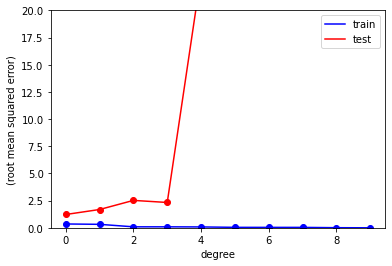

In [ ]:
x_test = np.array(X_test).reshape(-1,1)
y_test = np.array(Y_test).reshape(-1, 1)
train_error = np.empty(10)
test_error = np.empty(10)

for degree in range(10):
    
    polynomial_features= PolynomialFeatures(degree)
    x_poly = polynomial_features.fit_transform(x)
    Input = [('polynomial',polynomial_features),('modal',LinearRegression())] 
    pipe = p(Input)
    pipe.fit(x,y)
    
    train_error[degree] = np.sqrt(mean_squared_error(y, pipe.predict(x)))
    test_error[degree] = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
    
plt.scatter(np.arange(10),train_error, c = 'b')
plt.plot(np.arange(10), train_error, color='blue', label='train')
plt.scatter(np.arange(10),test_error, c = 'r')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 20.0))
plt.ylabel('(root mean squared error)')
plt.xlabel('degree')
plt.legend(loc="best")

**4. Generating 100 more data, fitting 9th order model and drawing its fit**

In [ ]:
np.random.seed(0)

X100_dataset = []
Y100_dataset = []

n=100  # Number of data points
X100=np.sort(np.random.uniform(0, 1, n))

for x100 in X100:
    Y100=m.sin(2*m.pi*x100) + 0.1*np.random.normal(0,1)
    X100_dataset.append(x100)
    Y100_dataset.append(Y100)

X100_train = X100_dataset
Y100_train = Y100_dataset

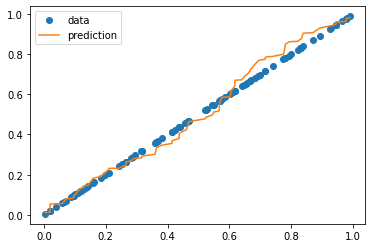

In [ ]:
x100_train = np.array(X100_train).reshape(-1,1)
y100_train = np.array(X100_train).reshape(-1,1)

polynomial_features1= PolynomialFeatures(degree = 9)
x100_poly = polynomial_features1.fit_transform(x100_train)
model1 = LinearRegression()
model1.fit(x100_poly, y100_train)
y100_poly_pred = model1.predict(x100_poly)

# plt.scatter(x100_train, y100_train, s=10)
# plt.plot(x100_train, y100_poly_pred, color='r')
# plt.ylabel('t')
# plt.xlabel('x')
# plt.legend(['predictions', 'data'])
# plt.show()  

x100_train = np.asarray(x100_train).squeeze()
y100_poly_pred = np.asarray(y100_poly_pred).squeeze()

f2 = interp1d(x100_train, y100_poly_pred, kind = 'cubic', fill_value="extrapolate")
xnew=np.sort(np.random.uniform(0, 1, 100))

plt.plot(x100_train, y100_train, 'o', x100_train, f2(xnew), '-')
plt.legend(['data', 'p4rediction'], loc = 'best')
plt.show()

**5. Drawing the fit for different lambdas using Ridge Regression**

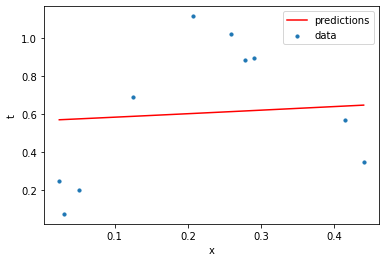

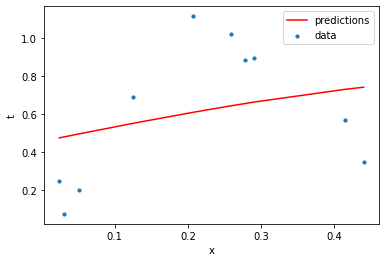

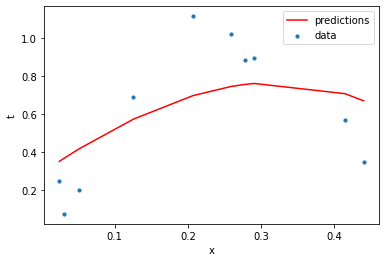

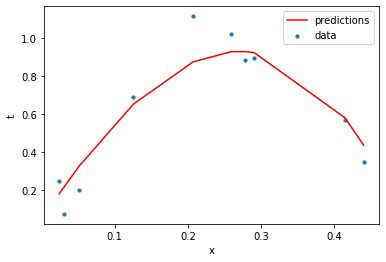

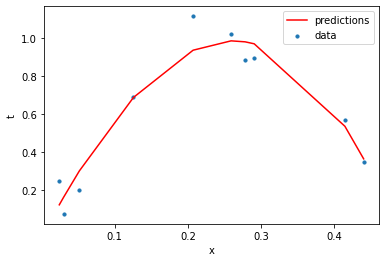

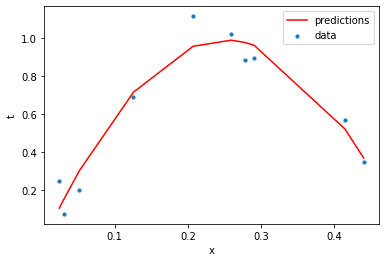

In [ ]:
Lambdas = [1, 1/10 ,1/100 ,1/1000 ,1/10000 ,1/100000]
lnL = [] 
new_train_error = np.empty(10)
new_test_error = np.empty(10)
degree = 9
i=0
for lambda_factor in Lambdas:
    
    polynomial_features= PolynomialFeatures(degree)
    x_poly = polynomial_features.fit_transform(x)
    Input = [('polynomial',polynomial_features),('modal',Ridge(lambda_factor))] 
    pipe = p(Input)
    pipe.fit(x,y)
    y_poly_pred = pipe.predict(x)

    new_train_error[i] = np.sqrt(mean_squared_error(y, pipe.predict(x)))
    new_test_error[i] = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
    lnL.append(np.log(lambda_factor))
    i = i+1
    # plt.figure(figsize=(10,6))
    plt.scatter(x,y,s=10)
  
    plt.plot(x, y_poly_pred, color='r')
    plt.ylabel('t')
    plt.xlabel('x')
    plt.legend(['predictions', 'data'])
    plt.show()  

In [ ]:
test_value = new_test_error[4:]
train_value = new_train_error[4:]

**6. Now according to above lambdas plotting train error vs test error**

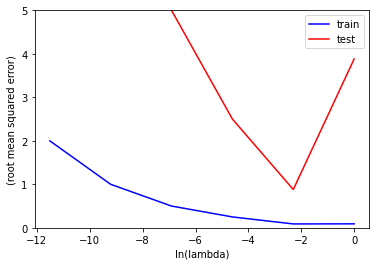

In [ ]:
# plt.scatter(lnL,train_value, c = 'b')
plt.plot(lnL, train_value, color='blue', label='train')
# plt.scatter(lnL,test_value, c = 'r')
plt.plot(lnL, test_value, color='red', label='test')
plt.ylim((0.0, 5.0))
plt.ylabel('(root mean squared error)')
plt.xlabel('ln(lambda)')
plt.legend(loc="best")